# 0. Intro

#### This dataset provides us information about 140 921 users in dataset and our task is to predict probability of target ('target' column).

#### This notebook includes:
- EDA
- data preprocessing before using models.
- customers classification
- perform interpretation and analysis of classification that have been created.
- checking data drift in model monitoring section

In [1]:
# Necessary libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20,15
import seaborn as sns
sns.set_palette(palette='viridis')

# df output optimization for cases if we want to print lots of data:
pd.set_option('display.notebook_repr_html', True)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 100)

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [2]:
! pip install lightgbm -q
! pip install optuna -q

# 1. EDA

In [89]:
df = pd.read_csv('score_test.csv', delimiter=';')
df.head()

,target,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521
0,0.0,76616859,14,2,0,M,26,3,2,0,1,0,15,14000,1,1,38097,0,0,0,-1,-1,0,0,0,0,0,1,312,312,3000,3000,5500,0,8220,144,0,835,5,NaN,1000,14,154,1,5,1,0,1,22,4,2,1,1,"0,373379926",11,0,1,0,1,0,0,9,1,1,0,-1,-1,-1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1014,0,0,1,0,1,1,1,1,10,27,37,6,11,5,0,0,0,0,0,0,0,0,20,25,18,0,"21075,61",14900,27,28,37654,2,3,0,0,0,0,0,0,0,0,0,0,0,1,"32718,41","10939,42","9920,04","9048,67","8160,04","26389,33",4,5,20,2,2,2,2,2,147,33,9,9,17,1,"21178,45","2588,55","8315,14","6193,37","11858,95","5960,04","0,126718561",28,29,"21128,85","2516,65","0,123198601",28,28,"21371,7","2265,29","0,100221885",1,0,0,0,0,0,0,0,0,1,1,1,0,"0,978322971",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,"0,982912651","0,950575285",1,"0,917838816",1,"0,998557183",1,1,1,1,1,"0,666666667",2,2,1,1,"1,125",1,"1,0625",1,"0,988636842","1,11096151",1,1,1,1,"1,229258468",4,0,0,0,0,0,0,0,0,1,1,1,0,"1,018204929",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,"1,002347501","1,028569726",1,1,1,1,"1,028571429",4,0,0,0,0,0,0,0,0,1,1,1,0,"0,996133271",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,"0,982912651","0,950575285",1,"0,917838816"

In [90]:
df.shape

(140921, 523)

In [91]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140921 entries, 0 to 140920
Data columns (total 523 columns):
 #    Column  Dtype  
---   ------  -----  
 0    target  float64
 1    id      int64  
 2    f1      int64  
 3    f2      int64  
 4    f3      int64  
 5    f4      object 
 6    f5      int64  
 7    f6      int64  
 8    f7      int64  
 9    f8      int64  
 10   f9      int64  
 11   f10     int64  
 12   f11     int64  
 13   f12     int64  
 14   f13     int64  
 15   f14     int64  
 16   f15     int64  
 17   f16     int64  
 18   f17     int64  
 19   f18     int64  
 20   f19     int64  
 21   f20     int64  
 22   f21     int64  
 23   f22     int64  
 24   f23     int64  
 25   f24     int64  
 26   f25     int64  
 27   f26     int64  
 28   f27     int64  
 29   f28     int64  
 30   f29     object 
 31   f30     object 
 32   f31     int64  
 33   f32     int64  
 34   f33     object 
 35   f34     int64  
 36   f35     int64  
 37   f36     int64  
 38   f3

In [92]:
# due to huge amount of columns we have to optimize memory if we want to make some feature engineering (like adding etc.)
def memory_optimizer(df):
    for i in df.columns:
        df[i].dtype
        if str(df[i].dtype.name) == 'float64':
            if df[i].max() < np.finfo(np.float16).max and df[i].min() > np.finfo(np.float16).min:
                df[i] = df[i].astype('float16')
            elif  df[i].max() < np.finfo(np.float32).max and df[i].min() > np.finfo(np.float32).min:
                df[i] = df[i].astype('float32')
            
        elif str(df[i].dtype.name) == 'int64':
            if df[i].max() < np.iinfo(np.int8).max and df[i].min() > np.iinfo(np.int8).min:
                df[i] = df[i].astype('int8')
            elif  df[i].max() < np.iinfo(np.int16).max and df[i].min() > np.iinfo(np.int16).min:
                df[i] = df[i].astype('int16')
            elif  df[i].max() < np.iinfo(np.int32).max and df[i].min() > np.iinfo(np.int32).min:
                df[i] = df[i].astype('int32')
    
    #Start memory size
    print(df.memory_usage().sum() /1024/1024 , 'MB')
    
    return df

In [93]:
df = memory_optimizer(df)
df.info()

261.93157291412354 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140921 entries, 0 to 140920
Columns: 523 entries, target to f521
dtypes: float16(1), float64(1), int16(42), int32(6), int8(279), object(194)
memory usage: 261.9+ MB


In [94]:
df.nunique()

target         2
id        135845
f1            24
f2            31
f3             7
f4             3
f5            58
f6             7
f7             5
f8             7
f9            10
f10            7
f11           17
f12          823
f13            6
f14            2
f15           14
f16            2
f17            2
f18            2
f19            1
f20            1
f21            1
f22           57
f23            1
f24          112
f25            1
f26          148
f27         1674
f28         1674
f29        11564
f30          384
f31          284
f32            2
f33        19716
f34         1031
f35            2
f36         2053
f37         1908
f38            0
f39          268
f40           33
f41         1531
f42            3
f43         1863
f44          107
f45           53
f46            4
f47          983
f48           48
f49           53
f50           50
f51           22
f52        82898
f53           18
f54            1
f55            2
f56         8355
f57           

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,102718.0,0.000000e+00,4.335938e-01,0.0,0.0,0.0,1.0,1.0
id,140921.0,7.689050e+07,1.496133e+06,74188580.0,75573425.0,76955589.0,78188919.0,79420863.0
f1,140921.0,1.237343e+01,5.127733e+00,0.0,9.0,12.0,16.0,23.0
f2,140921.0,1.638436e+01,8.932570e+00,1.0,9.0,17.0,24.0,31.0
f3,140921.0,3.071352e+00,1.981381e+00,0.0,1.0,3.0,5.0,6.0
f5,140921.0,3.069321e+01,8.924625e+00,18.0,24.0,30.0,36.0,76.0
f6,140921.0,2.541445e+00,1.431108e+00,0.0,1.0,2.0,4.0,6.0
f7,140921.0,1.426026e+00,6.659531e-01,-1.0,1.0,1.0,2.0,3.0
f8,140921.0,3.483001e+00,3.357024e+00,0.0,0.0,6.0,7.0,9.0
f9,140921.0,1.833346e+00,2.103963e+00,0.0,1.0,1.0,1.0,10.0


So, we can notice that there are some problems in our dataset:
- we need to transform our fake-categorical variables that was created by using ',' instead of '.'
- we have fake-numerical variables that have few unique values (to determ as true categorical we will use biyndary of 200 unique values)
- and of course we need to drop duplicated, constant columns etc.

In [96]:
df_test = df[df['target'].isna()]
df = df[df['target'].notna()]

# Deleting columns with non-unique, duplicated and all NaN values
df = df.drop_duplicates()
df2 = df.T.drop_duplicates().T

df2 = df.T.drop_duplicates().T
dfcols = df2.columns
dtype = df[dfcols].dtypes.to_dict()
df = df2.astype(dtype)

df = df.loc[:, (df != df.iloc[0]).any()]
df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101432 entries, 0 to 102717
Columns: 493 entries, target to f521
dtypes: float16(1), int16(41), int32(6), int8(254), object(191)
memory usage: 187.6+ MB


In [11]:
# data types checking
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101432 entries, 0 to 102717
Data columns (total 493 columns):
 #    Column  Dtype  
---   ------  -----  
 0    target  float16
 1    id      int32  
 2    f1      int8   
 3    f2      int8   
 4    f3      int8   
 5    f4      object 
 6    f5      int8   
 7    f6      int8   
 8    f7      int8   
 9    f8      int8   
 10   f9      int8   
 11   f10     int8   
 12   f11     int8   
 13   f12     int32  
 14   f13     int8   
 15   f14     int8   
 16   f15     int32  
 17   f16     int8   
 18   f17     int8   
 19   f18     int8   
 20   f22     int8   
 21   f24     int16  
 22   f26     int16  
 23   f27     int16  
 24   f28     int16  
 25   f29     object 
 26   f30     object 
 27   f31     int32  
 28   f32     int8   
 29   f33     object 
 30   f34     int16  
 31   f35     int8   
 32   f36     int16  
 33   f37     int16  
 34   f39     int32  
 35   f40     int8   
 36   f41     int16  
 37   f42     int8   
 38   f4

In [12]:
df.isna().sum()

target    0
id        0
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f22       0
f24       0
f26       0
f27       0
f28       0
f29       0
f30       0
f31       0
f32       0
f33       0
f34       0
f35       0
f36       0
f37       0
f39       0
f40       0
f41       0
f42       0
f43       0
f44       0
f45       0
f46       0
f47       0
f48       0
f49       0
f50       0
f51       0
f52       0
f53       0
f55       0
f56       0
f57       0
f58       0
f59       0
f60       0
f61       0
f62       0
f63       0
f67       0
f68       0
f69       0
f70       0
f71       0
f72       0
f73       0
f74       0
f75       0
f76       0
f77       0
f78       0
f79       0
f80       0
f81       0
f83       0
f84       0
f85       0
f86       0
f87       0
f88       0
f89       0
f90       0
f91       0
f92       0
f93 

In [13]:
# Data cleaning (probable false categoricals transforming)
categoricals = df.select_dtypes(include=['object']).columns

categoricals = categoricals.drop('f4')
df[categoricals] = df[categoricals].replace(',', '.', regex=True)
df[categoricals] = df[categoricals].astype('float64')
df = memory_optimizer(df)
df.info()

84.90015411376953 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101432 entries, 0 to 102717
Columns: 493 entries, target to f521
dtypes: float16(152), float32(39), int16(41), int32(6), int8(254), object(1)
memory usage: 84.9+ MB


In [14]:
y = df['target']
y = y.astype('int8')
X = df.drop(['target', 'id'], axis=1)
X.shape

(101432, 491)

In [15]:
y.value_counts()

0    76136
1    25296
Name: target, dtype: int64

In [16]:
X.shape

(101432, 491)

In [17]:
X.nunique().sort_values(ascending=False)

f334    91276
f314    85147
f319    83383
f495    77578
f500    74383
f438    74360
f316    73689
f343    71484
f443    69544
f348    68214
f440    62133
f381    59298
f386    54881
f335    52671
f295    50669
f516    47608
f315    46912
f521    46570
f344    46173
f299    45125
f349    43815
f496    42698
f459    42435
f464    40377
f407    36745
f439    34116
f318    26495
f296    21569
f317    20990
f499    16822
f33     15346
f442    14358
f385    13893
f498    12407
f336    12255
f337    12162
f340    12092
f350    11898
f345    11850
f384    11210
f52     11137
f441    10424
f338     7765
f339     7488
f497     7042
f383     5821
f29      4565
f480     4318
f515     3997
f408     3812
f465     3785
f402     3665
f478     3379
f423     3214
f382     3154
f366     2965
f458     2838
f401     2593
f56      2336
f421     2276
f364     2261
f503     2132
f36      2044
f472     2031
f467     2002
f468     1979
f479     1976
f469     1931
f520     1911
f475     1873
f37      1844
f474  

# 2. Data preprocessing before using models.

#### In this sectionwe are going to solve such tasks:
- encoding: one-hot and target (woe) 
- feature selection
- outliers for numerical features
- optional (only for regression): feature scaling

#### 2.1. Categorical features EDA and one-hot encoding (before train test split). 

This encoding is made before train test split 
because in train and test we can have different values and different dummy columns

In [18]:
# Categorical features EDA and one-hot encoding (before train test split)
uniques = pd.DataFrame(X.nunique().reset_index())
uniques.columns = ['feature', 'uniques']

uniques_dummies = uniques[(uniques['uniques']>2)&(uniques['uniques']<=9)]['feature']
X[uniques_dummies] = X[uniques_dummies].astype('category')
X = pd.get_dummies(data=X, dtype='int8', columns=X[uniques_dummies].columns)

uniques = pd.DataFrame(df.nunique().reset_index())
uniques.columns = ['feature', 'uniques']

uniques_oh = uniques[uniques['uniques']==2]['feature']

uniques_cat = uniques[(uniques['uniques']>2)&(uniques['uniques']<500)]['feature']
print('categorical_multiple', len(uniques_cat), '\ncategorical_binary', len(uniques_oh))
uniques_num = uniques[uniques['uniques']>=500]['feature']
print('numerical', len(uniques_num))

categorical_multiple 168 
categorical_binary 198
numerical 127


In [19]:
y.mean()

0.24938875305623473

#### 2.2. Target encoding methods (including woe-encoding are sensitive to overfitting so we need to make train_test_split)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=56)
train_df = pd.concat((X_train, y_train), axis=1)
print(train_df.shape)
train_df.head()

(81145, 560)


,f1,f2,f5,f9,f11,f12,f14,f15,f16,f17,f18,f22,f24,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f39,f40,f41,f43,f44,f45,f47,f48,f49,f50,f51,f52,f53,f55,f56,f60,f63,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f134,f135,f136,f137,f138,f139,f141,f142,f143,f144,f145,f146,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f220,f221,f222,f223,f224,f225,f226,f227,f228,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f360,f361,f362,f363,f364,f365,f366,f367,f368,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f474,f475,f476,f477,f478,f479,f480,f481,f482,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f3_0,f3_1,f3_2,f3_3,f3_4,f3_5,f3_6,f4_F,f4_M,f4_U,f6_0,f6_1,f6_2,f6_3,f6_4,f6_5,f6_6,f7_-1,f7_0,f7_1,f7_2,f7_3,f8_0,f8_1,f8_3,f8_6,f8_7,f8_8,f8_9,f10_0,f10_1,f10_2,f10_3,f10_4,f10_5,f10_6,f13_-1,f13_1,f13_2,f13_3,f13_4,f13_6,f42_0,f42_1,f42_3,f46_0,f46_1,f46_2,f46_3,f57_0,f57_1,f57_2,f57_3,f58_0,f58_1,f58_2,f58_3,f58_4,f58_5,f58_6,f58_7,f59_0,f59_1,f59_2,f59_3,f59_4,f59_5,f59_6,f61_0,f61_1,f61_2,f62_0,f62_1,f62_2,f308_0,f308_1,f308_2,f308_3,f308_4,f308_5,f308_6,f308_7,f308_10,target
48862,15,6,46,1,1,15000,1,38098,0,0,0,0,0,1,8,8,1400.0,1400.0,1100,0,140.000000,0,1,-1,-1,0,0,4,-1,0,0,4,2,1,1,0,0.000000,8,1,0.000000,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,422,0,2,0,2,3,0,4,2,9,11,3,5,3,1,1,1,1,1,1,1,4,7,6,1,0.000000,0.000000,0,0,5796,1,1,0,0,0,0,1,1,0,0,1,1,1,5781.180176,0.000000,5781.180176,0.000000,0.0,5838.680176,2,4,5,0,0,0,2,2,74,11,5,3,14,0,3028.469971,0.000000,0.0,0.0,0.0,0.0,0.000000,0,0,2778.219971,0.000000,0.000000,0,0,2528.750000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,2.000000,2.000000,0.0,0.000000,0.000000,2.000000,2.000000,2.000000,0.909757,0.0,0.909668,0.0,0.0,0.910643,1.500000,1.0,1.250000,0.0,0.0,0.0,1.000000,1.000000,1.043945,1.0,1.0,1.0,1.000000,0.0,1.098633,0.000000,0.0,0.0,0.0,0.0,0.000000,1.333

In [21]:
# Target (woe) encoding for categoricals with amount of unique values 3-200
from category_encoders import WOEEncoder
we = WOEEncoder()
X_train_woe = X_train[X_train.columns.intersection(uniques_cat)]
X_train_woe = X_train_woe.astype('category')
X_train_woe = pd.DataFrame(we.fit_transform(X_train_woe, y_train))

X_test_woe = X_test[X_test.columns.intersection(uniques_cat)]
X_test_woe = pd.DataFrame(we.transform(X_test_woe, y_test))

In [22]:
X_train_num = X_train[X_train.columns.intersection(uniques_num)]
X_test_num = X_test[X_test.columns.intersection(uniques_num)]

X_train_oh = X_train[X_train.columns.intersection(uniques_oh)]
X_test_oh = X_test[X_test.columns.intersection(uniques_oh)]

X_train = X_train_num.join([X_train_oh, X_train_woe])
X_test = X_test_num.join([X_test_oh, X_test_woe])

print(X_train.shape, '\n', X_test.shape)

(81145, 476) 
 (20287, 476)


#### 2.3. Outliers and feature selection
We use RFECV to define final features and woe to drop extremely weak predictors (woe<0.02)

In [23]:
# Calculate information value that will be used for feature selection (extremely low IV features excluding)
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                      
                    val,                                                           
                    df[df[feature] == val].count()[feature],                        
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) 

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    iv = data['IV'].sum()
#    print('This variable\'s IV is:',iv)
#    print(df[feature].value_counts())
    return iv

# outliers and missing values (NaNs)
def outlier(X):
    q1 = X.quantile(0.01)
    q3 = X.quantile(0.99)
    iqr = q3-q1
    lqi = q1 #- 1.5*iqr
    hqi = q3 #+ 1.5*iqr 
    X[(X > hqi)| (X < lqi) ] = np.nan #
    X.isna().sum()
    X = X.fillna(X.median())  
    return X

# feature selection
def feature_selection(X_train, y_train, X_test):
    from lightgbm import LGBMClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(solver= 'newton-cholesky', penalty='none', C=0.04893851892695899, n_jobs=-1, verbose=0)
    lgbm = LGBMClassifier(verbose= -1, learning_rate=0.1, max_depth=20, n_estimators=70, 
                          subsample=0.9, n_jobs=-1, random_state=5)
    
    cv = StratifiedKFold(n_splits=5, random_state=5, shuffle=True)
    
    # create a Fisher score scorer
    #fisher_scorer = make_scorer(f1_score, average='weighted')
    
    rfecv = RFECV(estimator=lgbm, n_jobs=-1, step=1, cv=cv, scoring='average_precision', min_features_to_select=1)
    rfecv_c = rfecv.fit(X_train, y_train)
    features = X_train.columns
    mask = rfecv.get_support()
    best_features = features[mask]
    
    X_train = X_train[X_train.columns.intersection(best_features)]
    X_test = X_test[X_train.columns.intersection(best_features)]
    return X_train, X_test

In [24]:
%%time
#def inform_values(df, target):
values = []
for i in uniques_oh:
    values.append(calc_iv(df=train_df[train_df.columns.intersection(uniques_oh)], feature=i, target='target'))
inform_values = pd.DataFrame()
inform_values['values'] = pd.DataFrame(values)
inform_values['feature'] = list(uniques_oh)
inform_values = inform_values.sort_values(by='values', ascending=False)
inform_values = inform_values.drop(index=0)
low_iv = inform_values[inform_values['values']<0.02]['feature']
X_train, X_test = X_train.drop(columns=low_iv), X_test.drop(columns=low_iv)

CPU times: total: 19.3 s
Wall time: 19.3 s


In [25]:
X_train.shape

(81145, 344)

In [26]:
X_train[X_train.columns.intersection(uniques_num)] = outlier(X_train[X_train.columns.intersection(uniques_num)])
X_test[X_test.columns.intersection(uniques_num)] = outlier(X_test[X_test.columns.intersection(uniques_num)])

In [27]:
%%time
X_train, X_test = feature_selection(X_train, y_train, X_test);
#X_train_s, X_test_s = feature_selection(X_train_s, y_train, X_test_s);

CPU times: total: 29min 36s
Wall time: 24min 46s


In [28]:
X_train.shape

(81145, 234)

# 3. Models

In [29]:
# tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, r2_score, confusion_matrix, make_scorer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# optuna
import optuna
from optuna.samplers import TPESampler
optuna.logging.set_verbosity(optuna.logging.FATAL)

In [30]:
# model evaluation and interpretation (roc_auc, feature importances/coefficients and heatmap)
def evaluation_interpretation(model_type, model):
    print(roc_auc_score(y_pred_train, y_train), 'roc_auc train')
    print(roc_auc_score(y_pred, y_test), 'roc_auc test')
    print('\nclassification report outliers 0,99/0,01\n', classification_report(y_pred, y_test))
    
    plt.figure(figsize=(12,5))
    ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')

    labelsx=['True','False']
    labels=['True','False']
    ax.set_xticklabels(labelsx)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Ground Truth')
    
    if model_type == 'lr':
        coef = model.coef_
        intercept = model.intercept_
        coef = pd.DataFrame(coef).T
        names = pd.DataFrame(X_train_s.columns)
        f_importances = pd.concat([names, coef],axis=1)
        f_importances.columns = ['Feature', 'Coefficient']
        f_importances = f_importances.sort_values(by='Coefficient', ascending=False)
    
    else:
        from sklearn.inspection import permutation_importance
        feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
        f_importances = pd.Series(result.importances_mean, index=X_train_s.columns)
        f_importances = pd.DataFrame(f_importances).reset_index()
        f_importances.columns = ['Feature', 'Importance']
        f_importances['Importance'] = f_importances['Importance'] \
                                            /f_importances['Importance'].sum()
        f_importances = f_importances.sort_values(by='Importance', ascending=False)
        
    return f_importances

#### 3.1 Logistic Regression. Main advantage: interpretability

In [31]:
ss = StandardScaler()
X_train_s = pd.DataFrame(ss.fit_transform(X_train))
X_test_s = pd.DataFrame(ss.transform(X_test))
X_train_s.columns, X_test_s.columns = X_train.columns, X_test.columns

In [32]:
# optuna parameters for logistic regression
def objective(trial):
    solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    if solver == 'saga':
    # grid params logistic regression
        param = {
     #   'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
            'penalty': trial.suggest_categorical('penalty', ['none', 'l1', 'l2', 'elasticnet'])
            ,'C': trial.suggest_float('C', 1e-8, 100, log=True)
            }
    # grid params logistic regression
        lr_opt = LogisticRegression(**param, solver='saga', random_state=5, n_jobs=-1)                                   
    elif solver == 'liblinear':
        param = {
            'penalty': trial.suggest_categorical('penalty', ['l1', 'l2'])
            ,'C': trial.suggest_float('C', 1e-8, 100, log=True)}
        lr_opt = LogisticRegression(**param, solver='liblinear', random_state=5, n_jobs=-1) 
    else:
        param = {
            'solver': trial.suggest_categorical('solver', ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'])
            ,'penalty': trial.suggest_categorical('penalty', ['none', 'l2'])
            ,'C': trial.suggest_float('C', 1e-8, 100, log=True)
            }
        lr_opt = LogisticRegression(**param, random_state=5, n_jobs=-1, class_weight='balanced')
                                       
#    lr_opt = LogisticRegression(**param, random_state=5, n_jobs=-1)
    #lr_opt.fit(X_train, y_train)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
    scores = cross_val_score(lr_opt, X_train_s, y_train, scoring=roc_auc_scorer, cv=skf)
    return np.min([np.mean(scores), np.median([scores])])

In [33]:
%%time
# objective function calling
from optuna.pruners import SuccessiveHalvingPruner
pruner = SuccessiveHalvingPruner(min_resource=1, reduction_factor=2, min_early_stopping_rate=0)

study = optuna.create_study(direction='maximize', pruner=pruner) #, pruner=optuna.pruners.MedianPruner()
study.optimize(objective, show_progress_bar=True, timeout=300, # n_trials=500,
              n_jobs=-1)

CPU times: total: 1min 46s
Wall time: 5min 51s


In [34]:
trial = study.best_trial
lr_opt_param = trial.params

lr_opt = LogisticRegression(**lr_opt_param, random_state=5, n_jobs=-1)
lr_opt.fit(X_train_s, y_train)
y_pred = lr_opt.predict(X_test_s)
y_pred_train = lr_opt.predict(X_train_s)

lr_opt_param

{'solver': 'sag', 'penalty': 'l2', 'C': 0.006342170342384939}

0.6996868315774714 roc_auc train
0.6667214827510894 roc_auc test

classification report outliers 0,99/0,01
               precision    recall  f1-score   support

           0       0.95      0.78      0.86     18701
           1       0.17      0.56      0.27      1586

    accuracy                           0.76     20287
   macro avg       0.56      0.67      0.56     20287
weighted avg       0.89      0.76      0.81     20287

CPU times: total: 78.1 ms
Wall time: 75.3 ms


,Feature,Coefficient
13,f279,0.200897
121,f53,0.197660
131,f281,0.187644
92,f513,0.169876
103,f1,0.169602
111,f30,0.164423
16,f293,0.154504
110,f26,0.152045
159,f332,0.128014
157,f329,0.122921


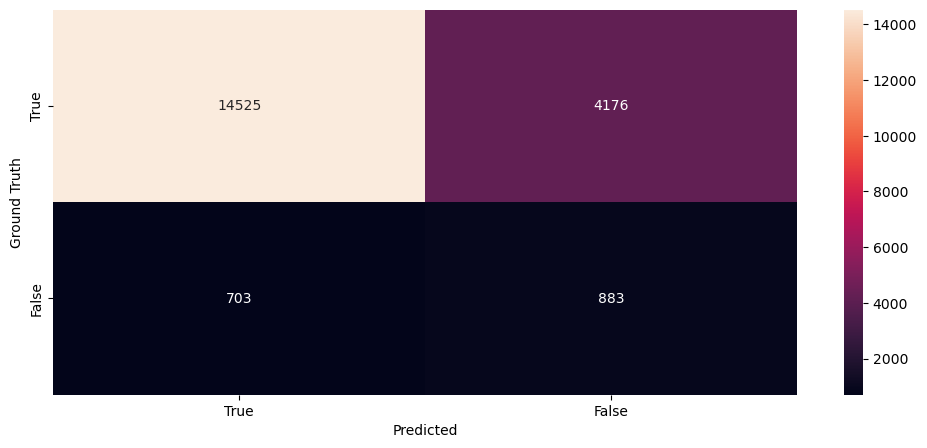

In [35]:
%%time
evaluation_interpretation('lr', lr_opt)

#### 3.2 Random forest

In [36]:
# Random forest from LightGBM due to higher speed in comparison with RandomForest from sklearn
def objective(trial):
    # grid params tree
    param = {
        'boosting_type': trial.suggest_categorical('boosting_type', ['rf'])
        ,'n_estimators': trial.suggest_int('n_estimators', 20, 200)
        ,'max_depth': trial.suggest_int('max_depth', 2, 20)
        ,'learning_rate': trial.suggest_float('learning_rate', 1e-8, 0.1, log=True)          
        ,'subsample': trial.suggest_uniform('subsample', 0.1, 0.9)  
        ,'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1,1)
    #regularization
        ,'num_leaves': trial.suggest_int('num_leaves', 10,200)
        , 'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10, log=True)
        , 'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10, log=True)
    }
    #regularization

    lgbm_opt = LGBMClassifier(**param, n_jobs=-1, random_state=5) #, class_weight='balanced')
    #lgbm_opt.fit(X_train_s, y_train)
    
#    X_t, y_t = X_train.values, y_train.values
    skf = StratifiedKFold(n_splits=5,random_state=5, shuffle=True) #.split(X_t, y_t)
    roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
    scores = cross_val_score(lgbm_opt, X_train, y_train, scoring=roc_auc_scorer, cv=skf)
    return np.min([np.mean(scores), np.median([scores])])

In [37]:
%%time
# function calling
from optuna.pruners import SuccessiveHalvingPruner
pruner = SuccessiveHalvingPruner(min_resource=1, reduction_factor=2, min_early_stopping_rate=0)

study = optuna.create_study(direction='maximize', pruner=pruner) #, pruner=optuna.pruners.MedianPruner()
study.optimize(objective, show_progress_bar=True, timeout=300, # n_trials=500,
              n_jobs=-1)

CPU times: total: 1h 11min 36s
Wall time: 6min 27s


In [38]:
trial = study.best_trial
rf_opt_param = trial.params
rf_opt = LGBMClassifier(**rf_opt_param, n_jobs=-1, random_state=5, verbose= -1) #, class_weight='balanced')
rf_opt.fit(X_train, y_train)
y_pred = rf_opt.predict(X_test)
y_pred_train = rf_opt.predict(X_train)

rf_opt_param

{'boosting_type': 'rf',
 'n_estimators': 75,
 'max_depth': 19,
 'learning_rate': 1.654714760533714e-05,
 'subsample': 0.38982546295060505,
 'feature_fraction': 0.5654848883788065,
 'num_leaves': 199,
 'lambda_l1': 0.008182341711182846,
 'lambda_l2': 0.01978341444018989}

0.7658694251946153 roc_auc train
0.70893796380855 roc_auc test

classification report outliers 0,99/0,01
               precision    recall  f1-score   support

           0       0.96      0.79      0.86     18590
           1       0.21      0.63      0.32      1697

    accuracy                           0.77     20287
   macro avg       0.59      0.71      0.59     20287
weighted avg       0.90      0.77      0.82     20287

CPU times: total: 59.7 s
Wall time: 1min 18s


,Feature,Importance
110,f26,1.516755e-01
121,f53,1.274651e-01
9,f52,8.241142e-02
16,f293,7.359307e-02
1,f27,3.094436e-02
111,f30,2.773769e-02
84,f495,2.405002e-02
135,f286,2.276736e-02
23,f318,2.132435e-02
154,f325,2.100369e-02


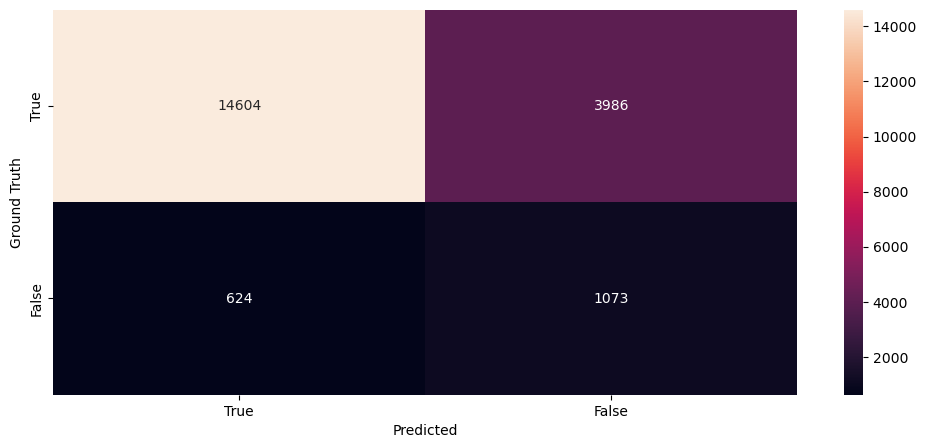

In [39]:
%%time
evaluation_interpretation('rf', rf_opt)

 #### 3.3 Boosting

In [79]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, make_scorer
def objective(trial):
    # grid params
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 20, 200)
        ,'max_depth': trial.suggest_int('max_depth', 2, 10)
        ,'learning_rate': trial.suggest_float('learning_rate', 1e-8, 0.1, log=True)          
        ,'subsample': trial.suggest_uniform('subsample', 0.1, 0.9)  
        ,'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1,1)
    #regularization
        ,'num_leaves': trial.suggest_int('num_leaves', 10,200)
        , 'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10, log=True)
        , 'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10, log=True)
    }
    #regularization

    lgbm_opt = LGBMClassifier(**param, verbose=-1, random_state=5) #, class_weight='balanced')
#    lgbm_opt.fit(X_tr, y_tr)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
    scores = cross_val_score(lgbm_opt, X_train, y_train, scoring=roc_auc_scorer, cv=skf)
    return np.min([np.mean(scores), np.median([scores])])

In [80]:
%%time
# function calling
from optuna.pruners import SuccessiveHalvingPruner, HyperbandPruner 
from optuna.integration import LightGBMPruningCallback
pruner = SuccessiveHalvingPruner(min_resource=1, reduction_factor=2, min_early_stopping_rate=0)
#pruner = LightGBMPruningCallback(trial, metric='auc')

study = optuna.create_study(direction='maximize', pruner=pruner) #, pruner=optuna.pruners.MedianPruner()
study.optimize(objective, show_progress_bar=True, timeout=300) # n_trials=500

   0%|          | 00:00/05:00

CPU times: total: 26min 59s
Wall time: 5min 1s


In [81]:
trial = study.best_trial
lgbm_opt_param = trial.params

lgbm_opt = LGBMClassifier(**lgbm_opt_param, verbose= -1, random_state=5, n_jobs=-1) #, class_weight='balanced')

#skf = StratifiedKFold(n_splits=5, shuffle=True)
#roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
#scores = cross_val_score(lgbm_opt, X_train, y_train, scoring=roc_auc_scorer, cv=skf)

lgbm_opt.fit(X_train, y_train, eval_metric='auc')

y_pred = lgbm_opt.predict(X_test)
y_pred_train = lgbm_opt.predict(X_train)

lgbm_opt_param

{'n_estimators': 198,
 'max_depth': 10,
 'learning_rate': 0.04655183448688159,
 'subsample': 0.8846119406251399,
 'feature_fraction': 0.12610404257705093,
 'num_leaves': 120,
 'lambda_l1': 0.0032967979883748197,
 'lambda_l2': 0.0002342812493550484}

0.837839989716004 roc_auc train
0.7141502593667579 roc_auc test

classification report outliers 0,99/0,01
               precision    recall  f1-score   support

           0       0.96      0.79      0.86     18554
           1       0.22      0.64      0.33      1733

    accuracy                           0.77     20287
   macro avg       0.59      0.71      0.60     20287
weighted avg       0.90      0.77      0.82     20287

CPU times: total: 1min 20s
Wall time: 2min 18s


,Feature,Importance
126,f274,1.339009e-01
12,f278,1.191950e-01
13,f279,1.184211e-01
207,f453,1.075851e-01
42,f360,9.520124e-02
92,f513,9.287926e-02
125,f273,8.978328e-02
91,f509,8.436533e-02
159,f332,8.359133e-02
43,f361,8.281734e-02


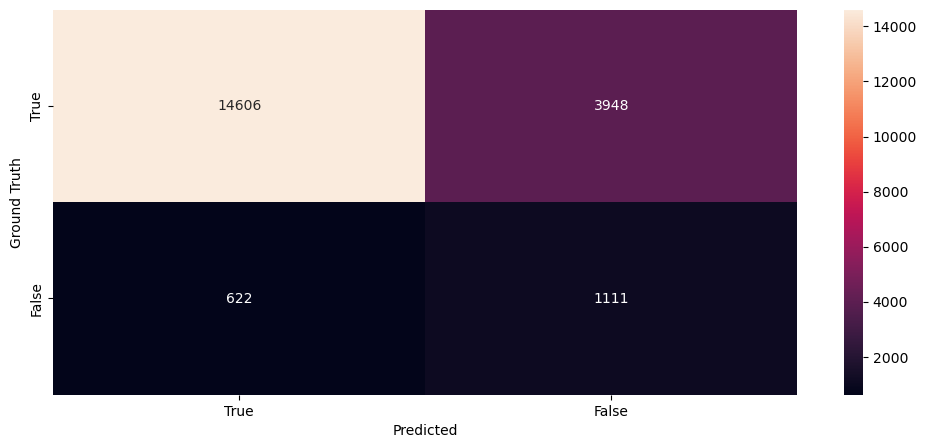

In [82]:
%%time
evaluation_interpretation('lgb', lgbm_opt)

# 5. Final predictions

In [97]:
df_test.tail()

,target,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521
140916,NaN,74190582,11,1,3,F,31,4,1,0,1,0,0,19500,3,1,38068,0,0,0,-1,-1,0,2,0,0,0,4,159,159,9525,11000,4200,0,6746,23,0,1338,1338,NaN,5100,27,116,3,810,0,0,0,123,10,4,4,0,0,14,0,1,0,0,5,2,9,1,2,0,-1,-1,-1,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1091,0,1,2,0,2,4,1,5,15,111,126,13,45,0,2,8,3,3,1,1,8,8,245,245,234,0,"13663,36","1363,64",0,0,135562,4,2,0,0,0,0,0,0,0,0,0,6,6,6,"161306,78","49697,44","111609,34",0,0,"179373,18",10,4,251,0,0,9,1,1,766,24,1,2,3,1,"68485,91","1404,45",0,0,0,0,"0,013220148",0,0,"69465,85","1404,45","0,013220148",0,0,"68374,27","1404,45","0,013220148",0,2,"1,142857143","1,5","1,5",0,0,"1,142857143","1,142857143","1,004098361","1,004098361","1,004291845",0,"1,011394695","1,25",1,1,1,0,0,0,0,0,0,0,0,0,"0,857142857","0,857142857","0,857142857","1,060004308","1,04248765","1,06796838",0,0,"1,116697624","0,909090909",1,1,0,0,"0,9",1,1,"1,011904762",1,1,1,1,1,"1,015964777",1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,"0,993646878","1,090912",1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,"0,9977121",1,"0,996696709",0,0,"0,997942063",1,1,1,0,0,1,1,1,"1,00130719",1,1,1,1,1,"0,985893212",1,0,0,0,0,1,0,2,"1,142857143","1,5",

In [98]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
target,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,38203.0,7.689818e+07,1.495421e+06,74188580.0,75588814.5,76946160.0,78216411.5,79420800.0
f1,38203.0,1.237720e+01,5.148440e+00,0.0,9.0,12.0,16.0,23.0
f2,38203.0,1.638510e+01,8.952396e+00,1.0,9.0,17.0,24.0,31.0
f3,38203.0,3.084601e+00,1.985844e+00,0.0,1.0,3.0,5.0,6.0
f5,38203.0,3.079379e+01,8.498591e+00,18.0,24.0,30.0,35.0,76.0
f6,38203.0,2.570819e+00,1.435024e+00,0.0,1.0,2.0,4.0,6.0
f7,38203.0,1.440358e+00,6.707415e-01,-1.0,1.0,1.0,2.0,3.0
f8,38203.0,3.463471e+00,3.354396e+00,0.0,0.0,6.0,7.0,9.0
f9,38203.0,1.829464e+00,2.099808e+00,0.0,1.0,1.0,1.0,10.0


In [99]:
df_test.isna().sum()

target    38203
id            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           0
f22           0
f23           0
f24           0
f25           0
f26           0
f27           0
f28           0
f29           0
f30           0
f31           0
f32           0
f33           0
f34           0
f35           0
f36           0
f37           0
f38       38203
f39           0
f40           0
f41           0
f42           0
f43           0
f44           0
f45           0
f46           0
f47           0
f48           0
f49           0
f50           0
f51           0
f52           0
f53           0
f54           0
f55           0
f56           0
f57           0
f58           0
f59           0
f60           0
f61     

In [100]:
X.shape

(101432, 559)

In [101]:
categoricals = df_test.select_dtypes(include=['object']).columns

categoricals = categoricals.drop('f4')
df_test[categoricals] = df_test[categoricals].replace(',', '.', regex=True)
df_test[categoricals] = df_test[categoricals].astype('float64')
df_test = memory_optimizer(df_test)
df_test.info()

31.514735221862793 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38203 entries, 102718 to 140920
Columns: 523 entries, target to f521
dtypes: float16(161), float32(33), float64(1), int16(42), int32(6), int8(279), object(1)
memory usage: 31.5+ MB


In [102]:
df_test

,target,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521
102718,NaN,77168263,6,21,5,M,37,3,1,0,7,0,14,25000,1,1,38093,0,0,0,-1,-1,0,0,0,29,0,20,4,4,3036.0,9000.0,3600,0,540.000000,0,1,143,118,NaN,1600,14,0,1,118,0,0,0,116,21,14,0,0,0.369629,70,0,1,0.000000,0,0,1,9,1,1,0,-1,-1,-1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,800,0,0,24,0,24,42,3,58,16,133,149,14,81,1,42,59,52,52,31,31,59,59,116,117,116,1,28089.250000,0.000000,12,12,80089,2,2,18,18,18,18,19,19,0,18,18,19,19,19,83508.867188,28089.250000,55419.621094,19960.550781,0.000000,8.661064e+04,21,2,135,0,1,12,9,9,243,1,6,2,123,3,32550.980469,18869.849609,0.000000,0.000000,0.000000,0.000000,0.654297,12,12,30993.259766,19031.570312,0.674316,12,12,29891.890625,19184.250000,0.692871,1.0,6.5,2.046875,2.572266,2.572266,0.0,0.0,2.046875,2.046875,1.282227,1.278320,1.282227,1.0,1.000000,0.000000,1.000000,1.0,1.0,0,0,2.599609,2.599609,1.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.000000,1.000,1.236328,0.0,1.000000,1.375000,0.666504,0.666504,1.216797,1.000000,1.0,1.0,1.007812,0.166626,1.037109,0.992188,0.000000,0.000000,0.000000,0.000000,0.973633,116.000000,1.615234,1.372070,1.4443

In [103]:
df_test_woe = df_test[df_test.columns.intersection(uniques_cat)]
df_test_woe.shape
#X_train_woe.shape

(38203, 168)

In [104]:
df_test = pd.get_dummies(data=df_test, dtype='int8', columns=['f4'])

df_test_woe = df_test[df_test.columns.intersection(X_train_woe.columns)]
df_test_woe = df_test_woe.astype('category')
df_test_woe = pd.DataFrame(we.transform(df_test_woe))

df_test_num = df_test[df_test.columns.intersection(uniques_num)]
df_test_oh = df_test[df_test.columns.intersection(uniques_oh)]

df_test = df_test_num.join([df_test_oh, df_test_woe])

X_tt = df_test[df_test.columns.intersection(X_train.columns)]

X_tt.shape

(38203, 234)

In [105]:
X_tt

,f12,f27,f29,f33,f34,f36,f41,f43,f47,f52,f56,f268,f278,f279,f291,f292,f293,f295,f296,f299,f314,f316,f317,f318,f319,f322,f328,f335,f336,f337,f338,f340,f343,f344,f345,f348,f350,f352,f353,f354,f355,f358,f360,f361,f364,f365,f366,f381,f382,f383,f384,f385,f386,f389,f395,f401,f402,f406,f408,f409,f411,f412,f413,f419,f438,f440,f442,f443,f446,f452,f458,f459,f463,f464,f465,f467,f468,f469,f472,f474,f475,f476,f479,f480,f495,f496,f497,f498,f499,f500,f503,f509,f513,f515,f516,f521,f69,f83,f173,f174,f238,f253,f260,f1,f2,f5,f11,f15,f22,f24,f26,f30,f31,f39,f40,f44,f45,f48,f49,f50,f51,f53,f60,f271,f272,f273,f274,f275,f276,f277,f280,f281,f283,f284,f285,f286,f287,f288,f289,f294,f297,f298,f300,f302,f303,f304,f306,f307,f311,f312,f313,f321,f323,f324,f325,f326,f327,f329,f330,f332,f341,f342,f346,f347,f351,f356,f357,f371,f372,f373,f374,f376,f377,f378,f379,f380,f387,f388,f390,f391,f392,f393,f394,f396,f397,f398,f399,f400,f420,f424,f426,f427,f428,f429,f431,f433,f434,f435,f436,f437,f444,f445,f447,f448,f449,f450,f451,f453,f454,f455,f456,f457,f470,f471,f477,f485,f486,f487,f488,f491,f492,f493,f494,f501,f502,f504,f505,f506,f507,f508,f510,f511,f512,f514
102718,25000,4,3036.0,540.000000,0,143,0,118,116,0.369629,0.000000,800,133,149,116,117,116,28089.250000,0.000000,80089,83508.867188,55419.621094,19960.550781,0.000000,8.661064e+04,135,243,18869.849609,0.000000,0.000000,0.000000,0.654297,30993.259766,19031.570312,0.674316,29891.890625,0.692871,6.5,2.046875,2.572266,2.572266,2.046875,1.282227,1.278320,1.000000,0.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.236328,1.216797,1.037109,0.992188,0.000000,116.000000,1.615234,1.444336,1.444336,2.066406,1.160156,1.244909,1.421343,0.0,1.193598,1.173828,1.167969,1.049805,0.991503,0.000000,0.969942,116.000000,2.808594,3.714844,3.714844,2.808594,1.487305,1.481445,1.487305,0.000000,1.141602,1.190471,1.000000,1.317383,1.0,0.00000,1.389556,1.451172,1.420898,1.016602,1.088867,0.983398,0.944336,1,1,0,0,0,0,0,-0.121846,-0.071089,-0.121870,-0.019462,0.067040,0.002569,0.485600,-0.126182,-0.446053,-0.289928,0.011613,-0.072728,-0.040536,0.005517,-0.442137,-0.638349,0.222187,0.054474,-0.513652,0.016509,0.259998,-0.091438,0.341045,0.017160,0.011508,-0.011215,-0.155034,-0.416233,-0.507652,-0.121990,-0.119886,-0.046837,-0.139326,0.125063,0.234285,0.157324,-0.000620,0.498745,0.500384,-0.003958,-0.364551,-0.197497,0.367817,-0.087798,0.157324,-0.029616,0.090185,-0.020357,0.011083,0.025177,0.043160,-0.204672,-0.443573,-0.457152,0.191249,-0.057498,-0.035293,0.471553,0.499773,0.494856,0.495962,-0.071021,0.010018,0.006883,0.226317,0.328596,-0.084361,-0.122192,0.009160,0.009498,-0.081978,-0.130831,0.049422,0.149608,-0.003891,0.040073,0.079877,-0.190982,-0.095917,-0.093390,-0.046194,-0.053961,-0.035357,0.508011,-0.689974,-0.077847,-0.023528,-0.894768,-1.136261,-0.284508,0.003174,0.003174,-0.144013,-0.163439,-0.284508,0.003174,-0.402291,-0.402291,-0.005105,0.03187,0.024686,-0.309201,0.036481,0.039479,-0.071150,-0.060968,-0.046799,0.535053,-0.158971,0.010018,0.006883,-0.036014,1.794933,1.101786,-0.284508,0.003174,0.009075,0.000000,0.000000,0.590960,-0.507652,-0.006274,0.036785,0.077441,-0.037281,-0.043700,-0.043621,-0.048685,-0.055901,-0.039413,-0.419759
102719,19000,54,3950.0,4102.700195,41,308,0,89,12,0.810059,0.000000,1065,47,61,38,42,26,11424.349609,0.000000,23124,89158.453125,49405.261719,22.350000,42693.160156,6.066506e+04,39,175,5623.740234,15227.519531,13773.700195,39730.839844,0.780762,7723.660156,5860.000000,0.780762,7705.390137,0.802734,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.046334,1.000000,1.071289,1.0,0.91748,1.000000,1.026367,1.017578,1.001953,0.975586,1.016602,9.500000,0.000000,0.000000,0.000000,0.000000,1.040039,0.963313,0.933403,1.0,1.000000,1.000000,1.005859,0.969238,0.959683,1.003906,1.000152,9.500000,0.000000,0.000000,0.000000,0.000000,1.027344,1.024414,1.040039,0.000000,1.000000,1.007947,1.000000,1.000000,1.0,0.91748,1.000000,1.026367,1.023438,1.048828,0.971680,0.9

In [106]:
# missing values (NaNs)
#X_tt = X_tt.fillna(X_tt.median())
X_tt_s = pd.DataFrame(ss.fit_transform(X_tt))
X_tt_s.columns = X_tt.columns

In [107]:
X_tt.describe().T

,count,mean,std,min,25%,50%,75%,max
f12,38203.0,1.849040e+04,1.673658e+04,10.000000,10000.000000,15000.000000,20000.000000,1.000000e+06
f27,38203.0,9.273206e+01,2.110271e+02,0.000000,1.000000,13.000000,51.000000,1.933000e+03
f29,38203.0,inf,inf,0.000000,0.000000,2000.000000,4300.000000,2.750400e+04
f33,38203.0,1.556424e+03,4.848145e+03,0.000000,0.000000,200.000000,1050.000000,1.224000e+05
f34,38203.0,1.975544e+01,8.540772e+01,0.000000,0.000000,0.000000,2.000000,1.901000e+03
f36,38203.0,3.146111e+02,4.514570e+02,-1.000000,-1.000000,92.000000,434.000000,2.078000e+03
f41,38203.0,6.537953e+01,1.821869e+02,-1.000000,0.000000,2.000000,19.000000,1.799000e+03
f43,38203.0,1.370614e+02,2.613431e+02,-1.000000,0.000000,28.000000,150.000000,1.990000e+03
f47,38203.0,6.417548e+01,1.109908e+02,0.000000,11.000000,32.000000,78.000000,2.318000e+03
f52,38203.0,1.959229e-01,2.988281e-01,0.000000,0.000000,0.027908,0.280640,1.000000e+00


#### 5.1. Logistic Regression Submission

In [108]:
y_tt_lr = lr_opt.predict_proba(X_tt_s)[:,1]
y_tt_lr = pd.DataFrame(y_tt_lr)
#y_tt_lr
df_test['target_lr']=y_tt_lr.values
#submission.to_csv('submitted_feo_lr.csv', index=False)
df_test.head()

,id,f12,f27,f28,f29,f33,f34,f36,f37,f41,f43,f47,f52,f56,f268,f278,f279,f291,f292,f293,f295,f296,f299,f314,f315,f316,f317,f318,f319,f322,f328,f334,f335,f336,f337,f338,f339,f340,f343,f344,f345,f348,f349,f350,f352,f353,f354,f355,f358,f360,f361,f362,f364,f365,f366,f381,f382,f383,f384,f385,f386,f389,f395,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f417,f418,f419,f421,f422,f423,f438,f439,f440,f441,f442,f443,f446,f452,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f472,f474,f475,f476,f478,f479,f480,f495,f496,f497,f498,f499,f500,f503,f509,f513,f515,f516,f517,f518,f519,f520,f521,target,f14,f16,f17,f18,f32,f35,f55,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f134,f135,f136,f137,f138,f139,f141,f142,f143,f144,f145,f146,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f220,f221,f222,f223,f224,f225,f226,f227,f228,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f1,f2,f5,f9,f11,f15,f22,f24,f26,f30,f31,f39,f40,f44,f45,f48,f49,f50,f51,f53,f60,f63,f270,f271,f272,f273,f274,f275,f276,f277,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f294,f297,f298,f300,f301,f302,f303,f304,f305,f306,f307,f309,f310,f311,f312,f313,f320,f321,f323,f324,f325,f326,f327,f329,f330,f331,f332,f333,f341,f342,f346,f347,f351,f356,f357,f363,f367,f368,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f387,f388,f390,f391,f392,f393,f394,f396,f397,f398,f399,f400,f420,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f444,f445,f447,f448,f449,f450,f451,f453,f454,f455,f456,f457,f470,f471,f477,f481,f482,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f501,f502,f504,f505,f506,f507,f508,f510,f511,f512,f514,target_lr
102718,77168263,25000,4,4,3036.0,540.000000,0,143,118,0,118,116,0.369629,0.0,800,133,149,116,117,116,28089.250000,0.000000,80089,83508.867188,28089.250000,55419.621094,19960.550781,0.000000,86610.640625,135,243,32550.980469,18869.849609,0.000000,0.000000,0.000000,0.000000,0.654297,30993.259766,19031.570312,0.674316,29891.890625,19184.250000,0.692871,6.5,2.046875,2.572266,2.572266,2.046875,1.282227,1.278320,1.282227,1.000000,0.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.236328,1.216797,1.037109,0.992188,0.000000,0.000000,0.000000,0.000000,0.973633,116.000,1.615234,1.37207,1.444336,1.444336,2.066406,2.066406,1.372070,1.160156,1.158203,1.160156,1.000000,0.000000,1.141602,1.244909,1.000000,1.421343,1.0,0.0,1.193598,1.173828,1.167969,1.049805,0.991503,0.000000,0.000000,0.00000,0.000000,0.969942,116.000,10.5,2.808594,3.714844,3.714844,2.808594,1.487305,1.481445,1.487305,1.000000,0.000000,1.141602,1.190471,1.000000,1.317383,1.0,0.00000,1.389556,1.451172,1.420898,1.016602,1.088867,0.983398,0.000000,0.00000,0.000000,0.000000,0.944336,NaN,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,-0.121846,-0.071089,-0.12187,0.151037,-0.019462,0.067040,0.002569,0.485600,-0.126182,-0.446053,-0.289928,0.011613,-0.072728,-0.040536,0.005517,-0.442137,-0.638349,0.222187,0.054474,-0.513652,0.016509,0.005091,-0.2044

In [109]:
df_test['target_lr'].mean()

0.25123044953956636

#### 5.2. Random Forest Submission

In [110]:
y_tt_rf = rf_opt.predict_proba(X_tt)[:,1]
y_tt_rf = pd.DataFrame(y_tt_rf)
df_test['target_rf']=y_tt_rf.values
#submission.to_csv('submitted_feo_rf.csv', index=False)
df_test.head()

,id,f12,f27,f28,f29,f33,f34,f36,f37,f41,f43,f47,f52,f56,f268,f278,f279,f291,f292,f293,f295,f296,f299,f314,f315,f316,f317,f318,f319,f322,f328,f334,f335,f336,f337,f338,f339,f340,f343,f344,f345,f348,f349,f350,f352,f353,f354,f355,f358,f360,f361,f362,f364,f365,f366,f381,f382,f383,f384,f385,f386,f389,f395,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f417,f418,f419,f421,f422,f423,f438,f439,f440,f441,f442,f443,f446,f452,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f472,f474,f475,f476,f478,f479,f480,f495,f496,f497,f498,f499,f500,f503,f509,f513,f515,f516,f517,f518,f519,f520,f521,target,f14,f16,f17,f18,f32,f35,f55,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f134,f135,f136,f137,f138,f139,f141,f142,f143,f144,f145,f146,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f220,f221,f222,f223,f224,f225,f226,f227,f228,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f1,f2,f5,f9,f11,f15,f22,f24,f26,f30,f31,f39,f40,f44,f45,f48,f49,f50,f51,f53,f60,f63,f270,f271,f272,f273,f274,f275,f276,f277,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f294,f297,f298,f300,f301,f302,f303,f304,f305,f306,f307,f309,f310,f311,f312,f313,f320,f321,f323,f324,f325,f326,f327,f329,f330,f331,f332,f333,f341,f342,f346,f347,f351,f356,f357,f363,f367,f368,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f387,f388,f390,f391,f392,f393,f394,f396,f397,f398,f399,f400,f420,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f444,f445,f447,f448,f449,f450,f451,f453,f454,f455,f456,f457,f470,f471,f477,f481,f482,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f501,f502,f504,f505,f506,f507,f508,f510,f511,f512,f514,target_lr,target_rf
102718,77168263,25000,4,4,3036.0,540.000000,0,143,118,0,118,116,0.369629,0.0,800,133,149,116,117,116,28089.250000,0.000000,80089,83508.867188,28089.250000,55419.621094,19960.550781,0.000000,86610.640625,135,243,32550.980469,18869.849609,0.000000,0.000000,0.000000,0.000000,0.654297,30993.259766,19031.570312,0.674316,29891.890625,19184.250000,0.692871,6.5,2.046875,2.572266,2.572266,2.046875,1.282227,1.278320,1.282227,1.000000,0.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.236328,1.216797,1.037109,0.992188,0.000000,0.000000,0.000000,0.000000,0.973633,116.000,1.615234,1.37207,1.444336,1.444336,2.066406,2.066406,1.372070,1.160156,1.158203,1.160156,1.000000,0.000000,1.141602,1.244909,1.000000,1.421343,1.0,0.0,1.193598,1.173828,1.167969,1.049805,0.991503,0.000000,0.000000,0.00000,0.000000,0.969942,116.000,10.5,2.808594,3.714844,3.714844,2.808594,1.487305,1.481445,1.487305,1.000000,0.000000,1.141602,1.190471,1.000000,1.317383,1.0,0.00000,1.389556,1.451172,1.420898,1.016602,1.088867,0.983398,0.000000,0.00000,0.000000,0.000000,0.944336,NaN,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,-0.121846,-0.071089,-0.12187,0.151037,-0.019462,0.067040,0.002569,0.485600,-0.126182,-0.446053,-0.289928,0.011613,-0.072728,-0.040536,0.005517,-0.442137,-0.638349,0.222187,0.054474,-0.513652,0.016509,0.0050

In [111]:
df_test['target_rf'].mean()

0.26286892850360916

#### 5.3. LightGBM Submission

In [112]:
y_tt_lgbm = lgbm_opt.predict_proba(X_tt)[:,1]
y_tt_lgbm = pd.DataFrame(y_tt_lgbm)
df_test['target_lgb']=y_tt_lgbm.values
# taking into aacount that lightgbm is the modt advanced algorithm for target column we use target_lgb
df_test['target_lgb']=y_tt_lgbm.values
df_test['target']=y_tt_lgbm.values
df_test.head()

,id,f12,f27,f28,f29,f33,f34,f36,f37,f41,f43,f47,f52,f56,f268,f278,f279,f291,f292,f293,f295,f296,f299,f314,f315,f316,f317,f318,f319,f322,f328,f334,f335,f336,f337,f338,f339,f340,f343,f344,f345,f348,f349,f350,f352,f353,f354,f355,f358,f360,f361,f362,f364,f365,f366,f381,f382,f383,f384,f385,f386,f389,f395,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f417,f418,f419,f421,f422,f423,f438,f439,f440,f441,f442,f443,f446,f452,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f472,f474,f475,f476,f478,f479,f480,f495,f496,f497,f498,f499,f500,f503,f509,f513,f515,f516,f517,f518,f519,f520,f521,target,f14,f16,f17,f18,f32,f35,f55,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f134,f135,f136,f137,f138,f139,f141,f142,f143,f144,f145,f146,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f220,f221,f222,f223,f224,f225,f226,f227,f228,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f1,f2,f5,f9,f11,f15,f22,f24,f26,f30,f31,f39,f40,f44,f45,f48,f49,f50,f51,f53,f60,f63,f270,f271,f272,f273,f274,f275,f276,f277,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f294,f297,f298,f300,f301,f302,f303,f304,f305,f306,f307,f309,f310,f311,f312,f313,f320,f321,f323,f324,f325,f326,f327,f329,f330,f331,f332,f333,f341,f342,f346,f347,f351,f356,f357,f363,f367,f368,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f387,f388,f390,f391,f392,f393,f394,f396,f397,f398,f399,f400,f420,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f444,f445,f447,f448,f449,f450,f451,f453,f454,f455,f456,f457,f470,f471,f477,f481,f482,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f501,f502,f504,f505,f506,f507,f508,f510,f511,f512,f514,target_lr,target_rf,target_lgb
102718,77168263,25000,4,4,3036.0,540.000000,0,143,118,0,118,116,0.369629,0.0,800,133,149,116,117,116,28089.250000,0.000000,80089,83508.867188,28089.250000,55419.621094,19960.550781,0.000000,86610.640625,135,243,32550.980469,18869.849609,0.000000,0.000000,0.000000,0.000000,0.654297,30993.259766,19031.570312,0.674316,29891.890625,19184.250000,0.692871,6.5,2.046875,2.572266,2.572266,2.046875,1.282227,1.278320,1.282227,1.000000,0.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.236328,1.216797,1.037109,0.992188,0.000000,0.000000,0.000000,0.000000,0.973633,116.000,1.615234,1.37207,1.444336,1.444336,2.066406,2.066406,1.372070,1.160156,1.158203,1.160156,1.000000,0.000000,1.141602,1.244909,1.000000,1.421343,1.0,0.0,1.193598,1.173828,1.167969,1.049805,0.991503,0.000000,0.000000,0.00000,0.000000,0.969942,116.000,10.5,2.808594,3.714844,3.714844,2.808594,1.487305,1.481445,1.487305,1.000000,0.000000,1.141602,1.190471,1.000000,1.317383,1.0,0.00000,1.389556,1.451172,1.420898,1.016602,1.088867,0.983398,0.000000,0.00000,0.000000,0.000000,0.944336,0.143878,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,-0.121846,-0.071089,-0.12187,0.151037,-0.019462,0.067040,0.002569,0.485600,-0.126182,-0.446053,-0.289928,0.011613,-0.072728,-0.040536,0.005517,-0.442137,-0.638349,0.222187,0.054474,-0.513652

In [113]:
df_test['target_lgb'].mean()

0.246245980743573

In [114]:
df_test[['id', 'target_lr', 'target_rf','target_lgb']].head()

,id,target_lr,target_rf,target_lgb
102718,77168263,0.199385,0.186744,0.143878
102719,77727465,0.307202,0.197762,0.227711
102720,77242568,0.093395,0.143514,0.106368
102721,77599785,0.604265,0.290266,0.187822
102722,75865710,0.085777,0.139538,0.049365


# 5. Data drift monitoring (bonus section)

In [115]:
! pip install feature_engine -q

In [116]:
def psi_feature_monitor(X_train, X_test):
    from feature_engine.selection import DropHighPSIFeatures
    transformer = DropHighPSIFeatures()
    transformer.fit(X_train, X_test)
    psi = pd.Series(transformer.psi_values_, index=X_test.columns)

    psi = pd.DataFrame(psi).reset_index() 
    psi.columns =['Feature', 'PSI']
    return print(psi.sort_values(by='PSI', ascending=False)), print('Total PSI (all features)', '\n', psi['PSI'].sum())

In [117]:
psi_feature_monitor(X_train, X_test)

    Feature           PSI
105      f5  5.704662e-03
32     f343  1.653512e-03
35     f348  1.377073e-03
221    f493  9.026452e-04
112     f31  8.558207e-04
129    f277  8.199300e-04
132    f283  8.044551e-04
151    f321  7.509824e-04
223    f501  7.409674e-04
93     f515  7.231624e-04
84     f495  7.162132e-04
19     f299  6.942062e-04
8       f47  6.733029e-04
11     f268  6.674059e-04
150    f313  6.645586e-04
104      f2  6.510010e-04
55     f401  6.271188e-04
170    f374  6.188764e-04
74     f465  6.025091e-04
107     f15  5.975821e-04
70     f458  5.926786e-04
158    f330  5.911806e-04
183    f396  5.858388e-04
16     f293  5.837902e-04
68     f446  5.713003e-04
56     f402  5.581553e-04
26     f328  5.568025e-04
128    f276  5.550177e-04
14     f291  5.494313e-04
227    f506  5.465498e-04
117     f48  5.444241e-04
220    f492  5.224001e-04
203    f448  5.144723e-04
174    f379  5.060354e-04
73     f464  5.004622e-04
80     f475  4.986992e-04
15     f292  4.972685e-04
31     f340 

(None, None)

In [118]:
psi_feature_monitor(X_train, X_tt)

    Feature           PSI
105      f5  5.704662e-03
32     f343  1.653512e-03
35     f348  1.377073e-03
221    f493  9.026452e-04
112     f31  8.558207e-04
129    f277  8.199300e-04
132    f283  8.044551e-04
151    f321  7.509824e-04
223    f501  7.409674e-04
93     f515  7.231624e-04
84     f495  7.162132e-04
19     f299  6.942062e-04
8       f47  6.733029e-04
11     f268  6.674059e-04
150    f313  6.645586e-04
104      f2  6.510010e-04
55     f401  6.271188e-04
170    f374  6.188764e-04
74     f465  6.025091e-04
107     f15  5.975821e-04
70     f458  5.926786e-04
158    f330  5.911806e-04
183    f396  5.858388e-04
16     f293  5.837902e-04
68     f446  5.713003e-04
56     f402  5.581553e-04
26     f328  5.568025e-04
128    f276  5.550177e-04
14     f291  5.494313e-04
227    f506  5.465498e-04
117     f48  5.444241e-04
220    f492  5.224001e-04
203    f448  5.144723e-04
174    f379  5.060354e-04
73     f464  5.004622e-04
80     f475  4.986992e-04
15     f292  4.972685e-04
31     f340 

(None, None)

#### As a conclusion we can notice that train/test samples and new sapmle for prediction have acceptable changes and suits for ML models in general.

# 6. Next steps:
#### So, we have fit the model and made predictions. But in future we can make some steps to improve performance and usability/modularity of our functions for next models.

#### Model performance:
- creating new features by adding, subtracting, multiplying, dividing of numerical features
- pairwise combinations of categorical features
- adding StratifyKFold to WOEEncoding
- exclude features with highest PSI and/or split data insuch way that can decrease difference between train/test/predicting samples.
- probably custom woe binning can have positive effect especially in logistic regression case.

#### Model scalability and modularity:
- standardazing and integraiting step-by-step preprocessing and modeling to custom sklearn pipelines (BaseEstimator, TransformerMixin)

#### Interpretability:
- SHAP Values can be one of interesting solutions. if sometimes we nned to explain credit decision about specific customer.